In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

raw_data = datasets.load_wine()
df = pd.DataFrame(data=raw_data.data,columns=raw_data.feature_names)
df['target'] = raw_data['target']
df['class'] = df['target'].map(lambda ind: raw_data['target_names'][ind])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [20]:
df.shape

(178, 15)

In [21]:
df_no_target = df.drop(['target','class'],axis='columns')

In [22]:
df_no_target.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [23]:
sns.set(style='whitegrid',palette='deep',font_scale=1.1,rc={'figure.figsize':[8,5]})

In [24]:
df.target.unique()

array([0, 1, 2])

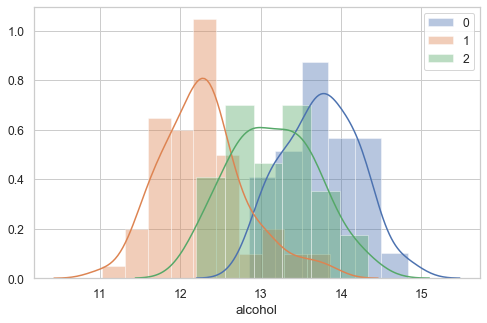

In [25]:
for i in df.target.unique():
    sns.distplot(df['alcohol'][df.target==i],kde=1,label='{}'.format(i))
plt.legend()

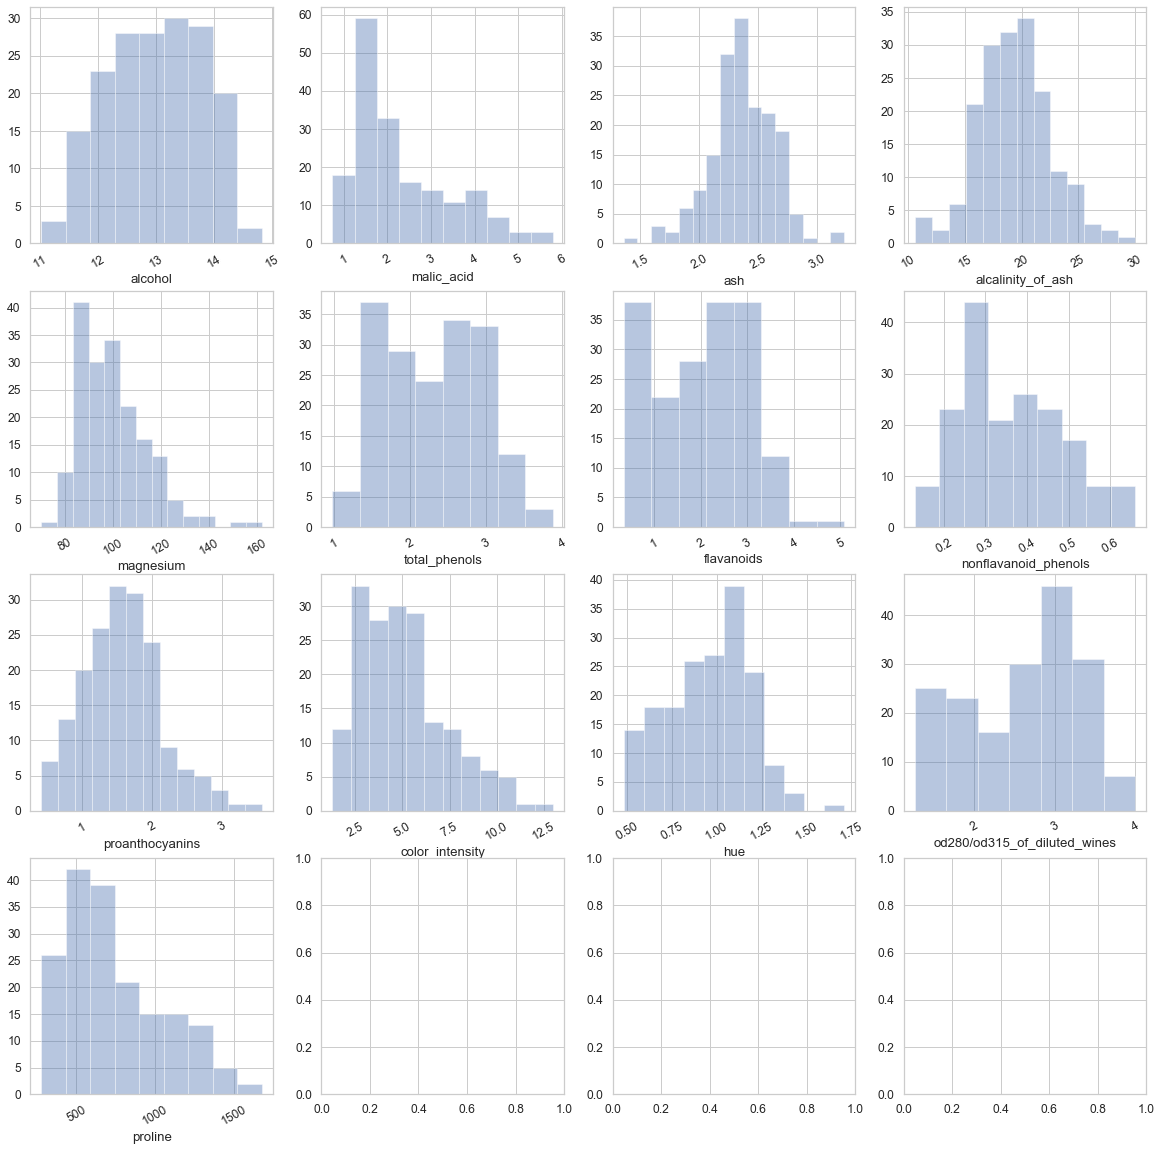

In [26]:
fig,ax = plt.subplots(4,4, figsize=(20,20))

for variable, subplot in zip(df_no_target.columns,ax.flatten()):
    sns.distplot(df[variable],ax=subplot,kde=0)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

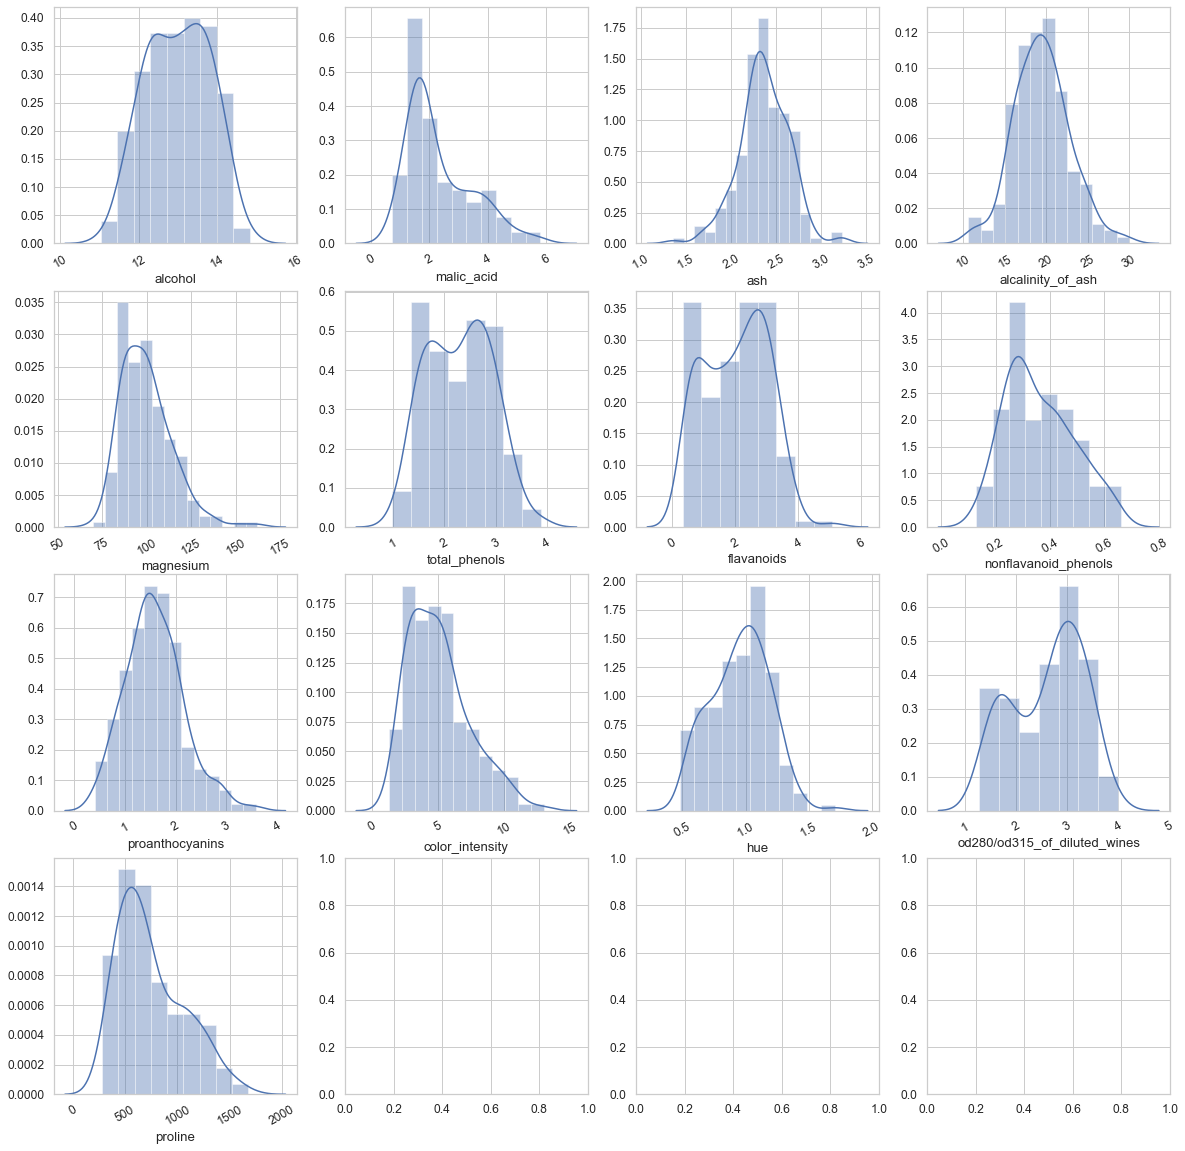

In [27]:
fig,ax = plt.subplots(4,4, figsize=(20,20))

for variable, subplot in zip(df_no_target.columns,ax.flatten()):
    sns.distplot(df[variable],ax=subplot,kde=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

In [28]:
pd.DataFrame(df.corr()['target']).sort_values('target',ascending=False)

,target
target,1.000000
alcalinity_of_ash,0.517859
nonflavanoid_phenols,0.489109
malic_acid,0.437776
color_intensity,0.265668
ash,-0.049643
magnesium,-0.209179
alcohol,-0.328222
proanthocyanins,-0.499130
hue,-0.617369


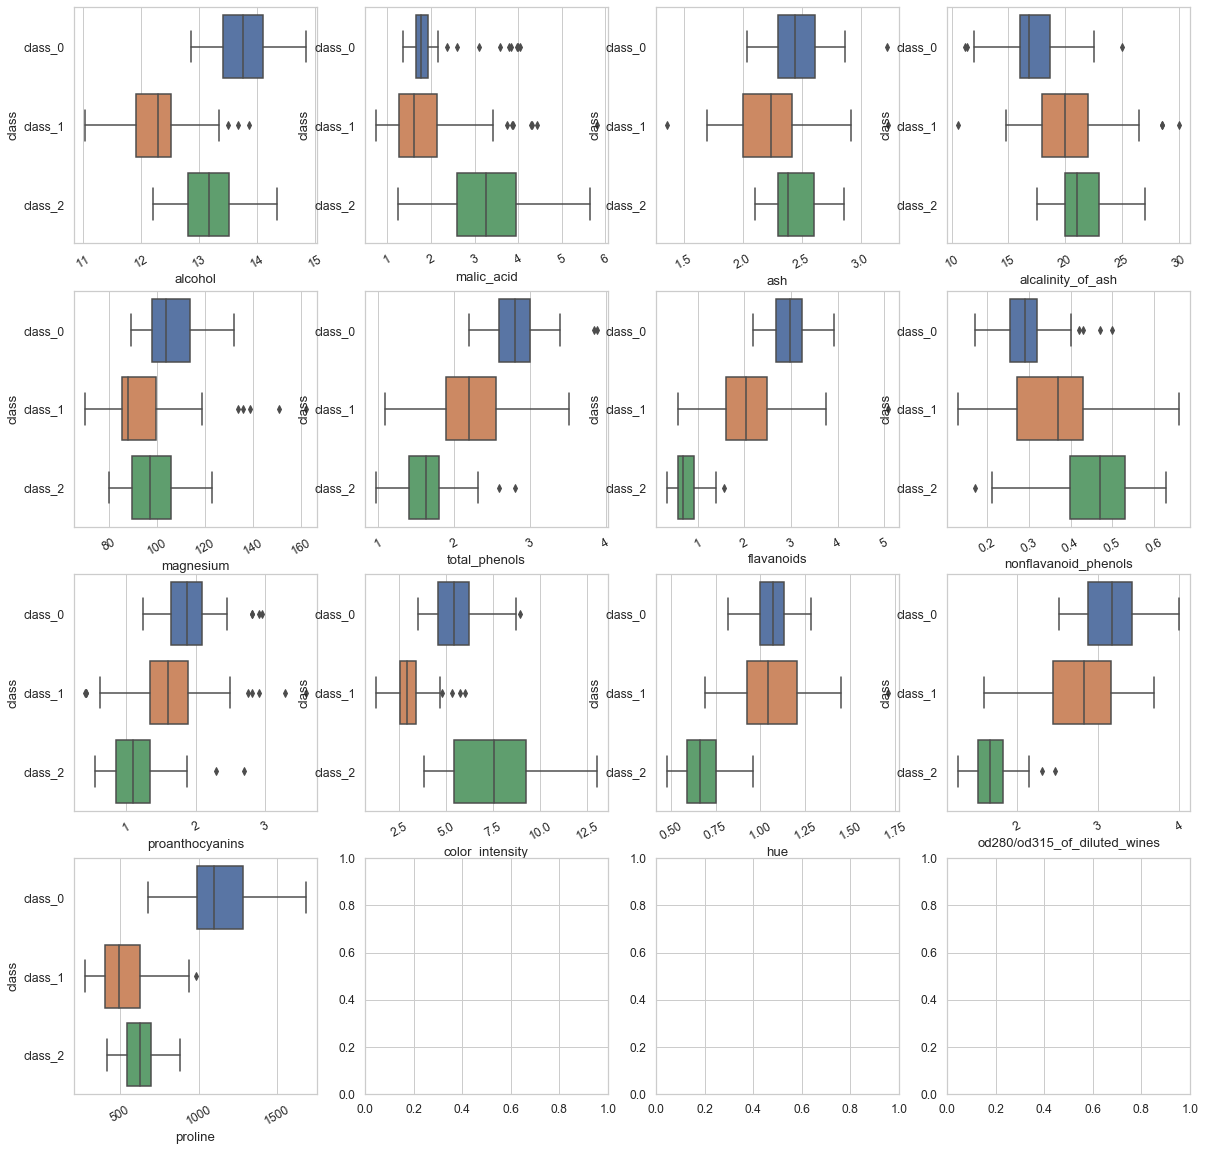

In [29]:
fig,ax = plt.subplots(4,4, figsize=(20,20))

for variable, subplot in zip(raw_data['feature_names'],ax.flatten()):
    sns.boxplot(df[variable],df['class'],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

alcohol


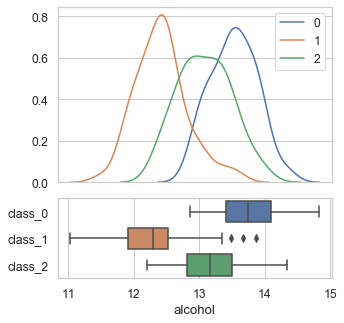

------------------------------------------------------------------
malic_acid


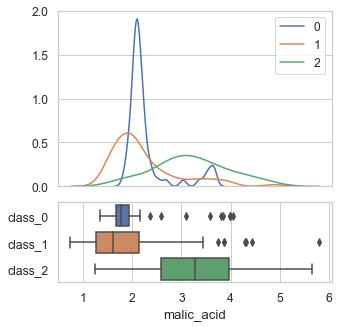

------------------------------------------------------------------
ash


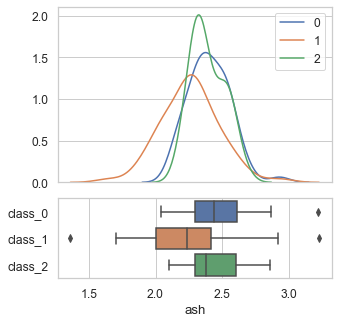

------------------------------------------------------------------
alcalinity_of_ash


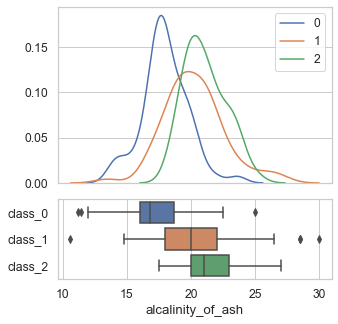

------------------------------------------------------------------
magnesium


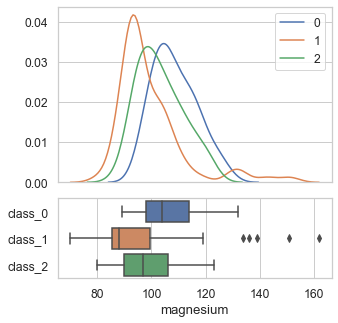

------------------------------------------------------------------
total_phenols


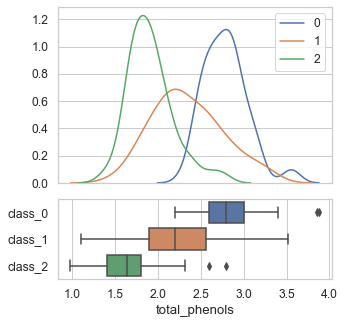

------------------------------------------------------------------
flavanoids


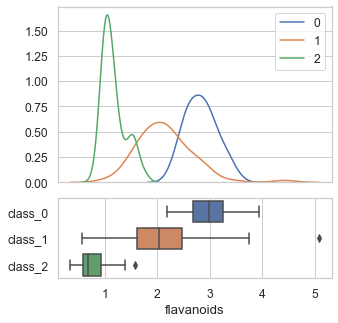

------------------------------------------------------------------
nonflavanoid_phenols


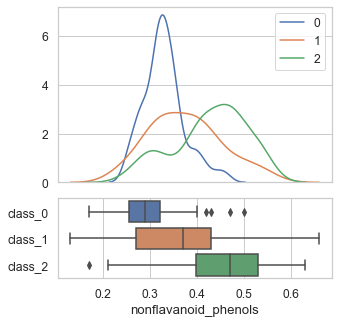

------------------------------------------------------------------
proanthocyanins


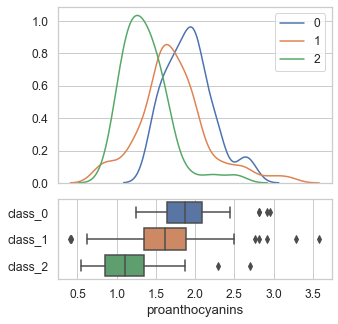

------------------------------------------------------------------
color_intensity


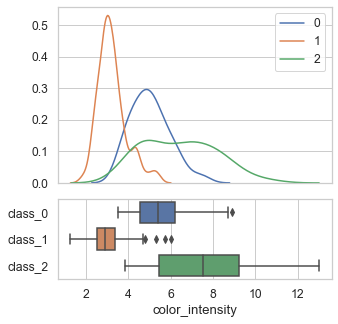

------------------------------------------------------------------
hue


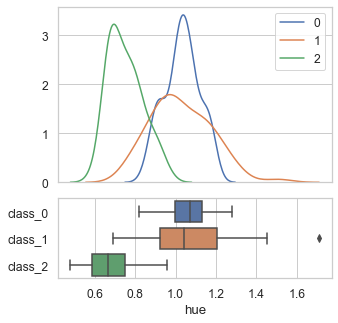

------------------------------------------------------------------
od280/od315_of_diluted_wines


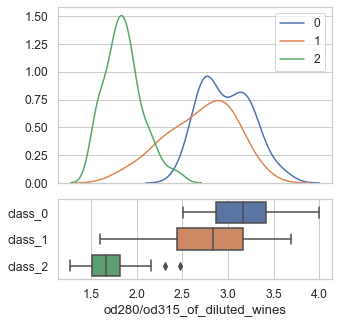

------------------------------------------------------------------
proline


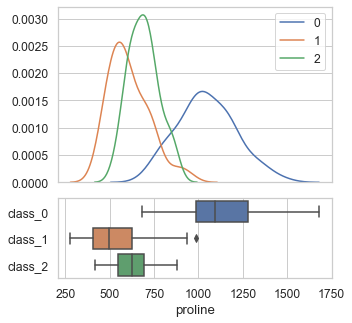

------------------------------------------------------------------


In [30]:
import matplotlib.gridspec as gridspec
for feature in raw_data['feature_names']:
    print(feature)
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=df,ax=ax2)
    sns.kdeplot(df[feature][df.target==0],ax=ax1,label='0')
    sns.kdeplot(df[feature][df.target==1],ax=ax1,label='1')
    sns.kdeplot(df[feature][df.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()
    print('------------------------------------------------------------------')


In [31]:
pd.DataFrame(df.corr()['target']).sort_values('target',ascending=False)

,target
target,1.000000
alcalinity_of_ash,0.517859
nonflavanoid_phenols,0.489109
malic_acid,0.437776
color_intensity,0.265668
ash,-0.049643
magnesium,-0.209179
alcohol,-0.328222
proanthocyanins,-0.499130
hue,-0.617369


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','class','hue','magnesium','ash','malic_acid'],axis='columns'),df['target'],test_size=0.2)
print(len(X_train),'samples in training data\n',len(X_test),'samples in test data\n')

142 samples in training data
 36 samples in test data



In [3]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [7]:
X_train[0]

array([-0.77003691,  0.84094827, -0.46521097,  0.06135474, -0.21340479,
        0.00549078, -1.32217879,  0.49409068, -1.30414289])

In [66]:
params = {'objective':['multi:softmax'],
          'learning_rate': [0.01,0.05,0.07,0.1], #so called `eta` value
          'max_depth': [3,5,7,9],
          'min_child_weight': [2,5,8],
          'subsample': [0.5,0.7],
          'colsample_bytree': [0.5,0.7],
          'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
         }

In [67]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])

In [68]:
grid = GridSearchCV(xgb.XGBClassifier(random_state=10),param_grid=params,cv = 10,scoring = 'accuracy')
grid.fit(X,y)
grid.best_score_

0.9712418300653596

In [70]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
import pickle as pkl

pkl.dump(grid,open('wine-classifier/wine_clssifier.pkl','wb'))

In [84]:
df.drop(['target','class','hue','magnesium','ash','malic_acid'],axis='columns').describe().loc[['min','max'],:]

,alcohol,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
min,11.03,10.6,0.98,0.34,0.13,0.41,1.28,1.27,278.0
max,14.83,30.0,3.88,5.08,0.66,3.58,13.00,4.00,1680.0


In [100]:
grid.predict(np.asarray([[11.03,10.6,0.98,0.34,0.13,0.41,1.28,1.27,278.0]]))

array([0])

In [104]:
nput_data = {
        'alcohol':11.03,
        'alcalinity_of_ash':10.6,
        'total_phenols':0.98,
        'flavanoids':0.34,
        'nonflavanoid_phenols':0.13,
        'proanthocyanins':0.41,
        'color_intensity':1.28,
        'od280/od315_of_diluted_wines':1.27,
        'proline':278
    }
data = np.asarray([list(nput_data.values())])
data

array([[1.103e+01, 1.060e+01, 9.800e-01, 3.400e-01, 1.300e-01, 4.100e-01,
        1.280e+00, 1.270e+00, 2.780e+02]])